# Queueing Simulation

In [121]:
# Dependencies
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [122]:

# Constants
lamdba = 1              # average number of arrivals per time period
walkin_mean = 2        # average time interval between walk-ins in minutes
walkin_sd = 0.5        # standard deviation of walk-ins in minutes
service_time_mean = 3        # time in minutes to complete service and allow next object in queue
service_time_sd = 0.5   # standard deviation of service time


In [123]:
# Model Parameters
number_of_people = 25
sim_stop = 0

In [124]:
# calc arrival time and service time interval
cumulative_time = np.random.normal(loc=walkin_mean, scale=walkin_sd, size=number_of_people).cumsum()
cumulative_time = np.insert(cumulative_time, 0,0)
service_time = np.random.normal(loc=service_time_mean, scale=service_time_sd, size=number_of_people)
service_time = np.insert(service_time, 0,0)


In [125]:
# Stored values
wait_time=[0]
leave_time=[0]
queue_count=[0]

for i in range(1,len(cumulative_time)):

    # calc wait time
    most_recent_leave_time = leave_time[i-1]
    current_time = cumulative_time[i]

    wait_time.append(max(0, most_recent_leave_time - current_time))

    # calc service finished time / leaving time
    current_leave_time = current_time + service_time[i] + wait_time[i]
    leave_time.append(current_leave_time)

    # calc queue backlog
    current_queue_count = np.count_nonzero( (cumulative_time < current_leave_time ) & (cumulative_time > current_time) )
    queue_count.append(current_queue_count)

    # sim_stop identifies the index where the leaving time exceeds the final start time.  By default the que will always decrease at this point.
    if (sim_stop==0):
        final_start_time = cumulative_time[-1]
        sim_stop = i if (current_leave_time > final_start_time ) else 0
   


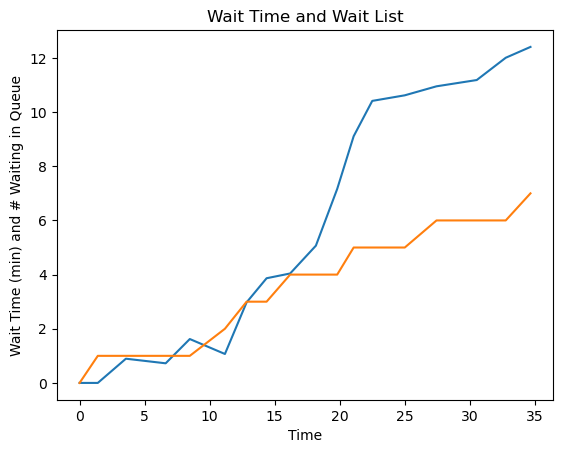

In [126]:

# Generate plots
plt.plot(cumulative_time[0:sim_stop], wait_time[0:sim_stop], label="Wait Time")
plt.plot(cumulative_time[0:sim_stop], queue_count[0:sim_stop], label="Wait List")
plt.title("Wait Time and Wait List")
plt.xlabel("Time")
plt.ylabel("Wait Time (min) and # Waiting in Queue");





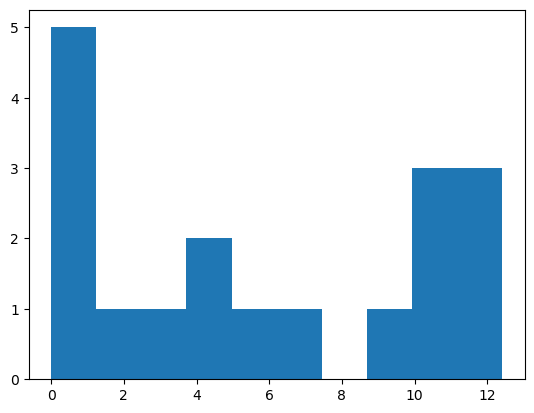

In [128]:
# show histogram of time spent waiting in queue
plt.hist(wait_time[0:sim_stop], label="Wait Time");

In [129]:
wait_time[0:sim_stop]

[0,
 0,
 0.8942569570528405,
 0.7242312192271818,
 1.6207534568582762,
 1.06870703095856,
 2.974480161240372,
 3.865460172787362,
 4.041380653573697,
 5.067767214274596,
 7.163261259593163,
 9.108989445141837,
 10.414250364146024,
 10.620211286413557,
 10.952713104946614,
 11.184757634178577,
 12.007117703058242,
 12.407192170947056]